### Neshyba, 2023

# Analytical $S_{tot}(T)$ for phase transformations

## The idea of this exercise

This exercise is all about the spontaneity of phase transformations at a given pressure -- we'll say, the standard atmospheric pressure ($P^o$). Because of this, we'll leave out the pressure in the formulas we give below; the notation is a little less cumbersone that way. 

For a spontaneous process (indicated by *trs* here), the second law requires that

$$
\Delta S_{tot}(T) = \Delta S_{trs}(T) + \Delta S_{surr}(T) > 0 \ \ \ \ (1)
$$  

where we understand the first term on the right hand side to be the *system's* change in entropy, while the second term is the *surrounding's* change in entropy (at $P^o$). Focusing first on the system, we can say 

$$
\Delta S_{trs}(T) = \Delta S^o + \int_{T^o}^T {\Delta C_P \over T}dT \ \ \ \ (2)
$$

where $trs$ could indicate vaporization, melting, or sublimation, and $T^o$ is the standard temperature, $298 K$. Under the assumption of constant $C_P$, this integrates out to 

$$
\Delta S_{trs}(T) = \Delta S^o + \Delta C_P \ log \big ({T \over T^o} \big ) \ \ \ \ (3)
$$

Meanwhile, we can approximate the second term on the right-hand-side of Eq. (1) as 

$$
\Delta S_{surr}(T) = -{\Delta H_{trs} \over T_{surr}} \ \ \ \ (4)
$$

Throughout this exercise, we'll make the additional assumption that the system is in *thermal equilibrium* with the surroundings, i.e., $T=T_{surr}$.

## Learning Goals
1. I can predict how the entropy change of a system undergoing a phase transformation varies with temperature.
1. I can predict how the entropy change of the surroundings associated with this transformation varies with temperature.
1. I can put these two together to make predictions about the temperature at which a phase transformation will become spontaneous.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

### Water transitioning from liquid to vapor
The cell below assigns standard-state values for water.

In [3]:
# Here's the standard-state temperature
T0 = AssignQuantity(298,'K')

# Standard-state enthalpy of vaporation
Delta_H0_vap = AssignQuantity(40700,'J/mol'); print(Delta_H0_vap)

# Standard-state entropies
SS_liq = AssignQuantity(69.95,'J/mol/K')
SS_gas = AssignQuantity(188.8,'J/mol/K')

# Standard-state heat capacities
CP_liq = AssignQuantity(75.4,'J/mol/K')
CP_gas = AssignQuantity(33.6,'J/mol/K')

40700 joule / mole


### Computing temperature-dependent entropy of vaporization for water
In the cell below, the goal is to compute and graph temperature-dependent entropies associated with the vaporization of water.

118.85000000000001 joule / kelvin / mole


<IPython.core.display.Javascript object>


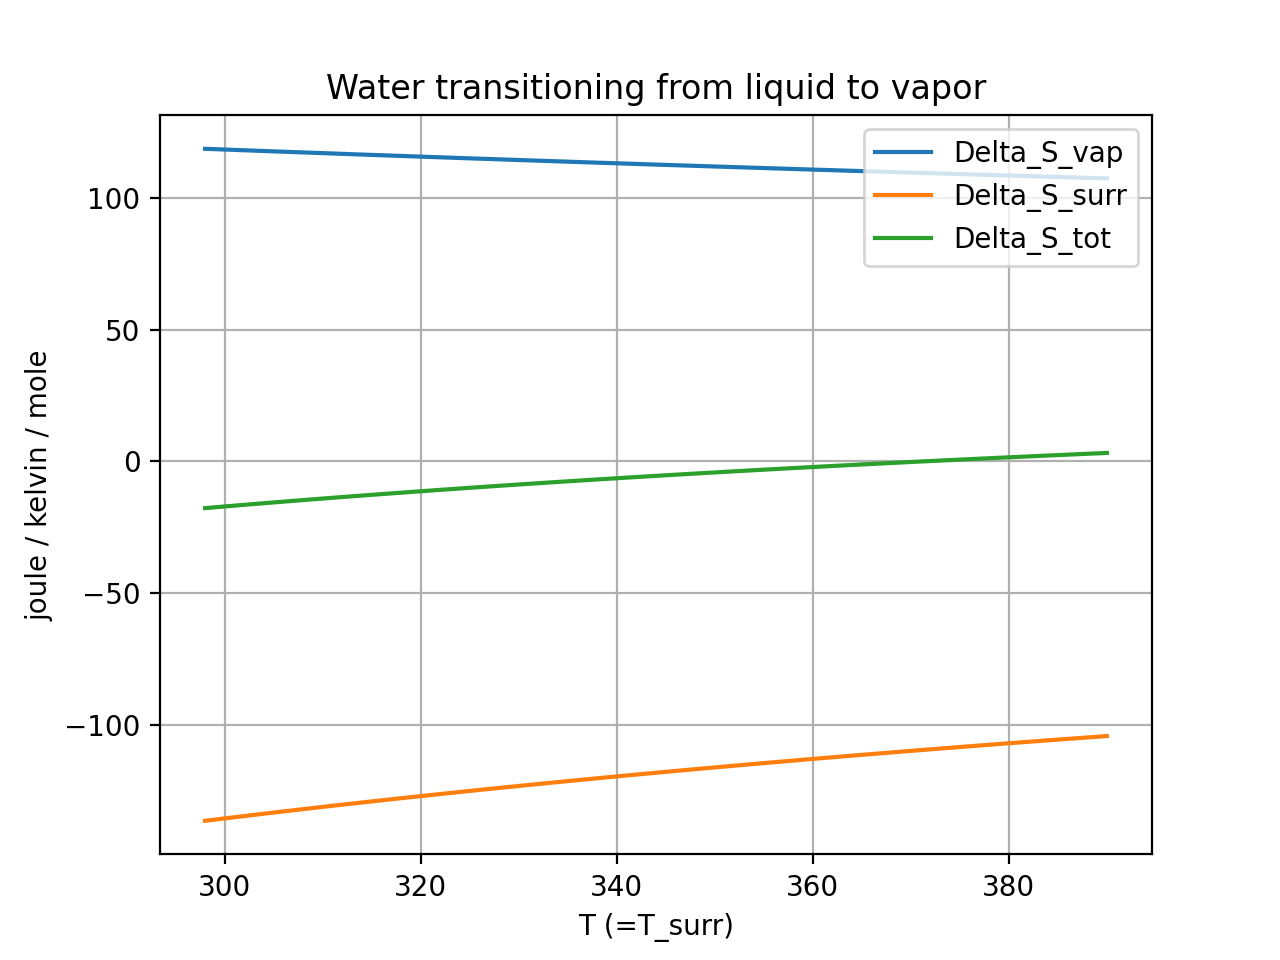

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [4]:
# Lay out an array of temperatures that spans water's boiling temperature
Tmax = AssignQuantity(390,'K')
T = T_surr = AssignQuantity(np.linspace(T0,Tmax))

# Compute the standard-state entropy of vaporization (vapor - liquid)
### BEGIN SOLUTION
Delta_S0_vap = SS_gas-SS_liq; print(Delta_S0_vap)
### END SOLUTION

# Compute the difference in heat capacities (vapor - liquid)
### BEGIN SOLUTION
Delta_CP = CP_gas-CP_liq
### END SOLUTION

# Use Eq. 3 to compute the entropy of vaporization for all the temperatures in our temperature array
### BEGIN SOLUTION
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)
### END SOLUTION

# Use Eq. 4 to compute the change in entropy of the surroundings
### BEGIN SOLUTION
Delta_S_surr = -Delta_H0_vap/T_surr
### END SOLUTION

# Use Eq. 1 to calculate the total entropy change of vaporization for all the temperatures in our temperature array
### BEGIN SOLUTION
Delta_S_tot = Delta_S_vap + Delta_S_surr
### END SOLUTION

# Graph all three in J/mol/K (here using assumed variable names -- you may need to change them)
plt.figure()
plt.plot(T,Delta_S_vap,label='Delta_S_vap')
plt.plot(T,Delta_S_surr,label='Delta_S_surr')
plt.plot(T,Delta_S_tot,label='Delta_S_tot')
plt.grid(True)
plt.title('Water transitioning from liquid to vapor')
plt.xlabel('T (=T_surr)')
plt.ylabel(Delta_S_tot.units)
plt.legend()

### Pause for analysis

In the space below, offer responses to the following. Relevant ideas could include *positional entropy*, *thermal entropy*, the *Thermodynamic Definition of Entropy*, 

1. The *sign* of $\Delta S_{vap}(T)$ is positive. Why?

1. The *sign* of $\Delta S_{surr}(T)$ is negative. Why?

1. Given that 2nd law says water boiling will become spontanenous when the temperature rises above the point at which $\Delta S_{tot} \approx 0$, use the graph above to predict the boiling temperature of water. 

1. The number you get for the previous question might be a little different from the known value of $373 K$, because of some approximations that have crept into our analysis. Offer a speculation as to which approximation(s) are the most likely to lead to such errors?

### BEGIN SOLUTION

1. Gases have lots more positional entropy than liquids.
1. Heat is required to vaporize a liquid, and that heat comes from the surroundings. Since heat is leaving the surroundings, the entropy of the surroundings must go down.
1. It's about 371 K.
1. It's assumed that the enthalpy of vaporization, and the heat capacities, are all temperature-independent. Those assumptions could have thrown the prediction off.

### END SOLUTION

### Water transitioning from solid (ice) to liquid
In the cell below, we assign additional standard-state values for water that we'll need for computing its entropy of fusion.

In [5]:
# Standard-state enthalpy of melting
Delta_H_fus = AssignQuantity(6020,'J/mol');  print('Delta_H_fus',Delta_H_fus)

# Standard-state entropy of the solid
SS_sol = AssignQuantity(44.62,'J/mol/K')

# Heat capacity of the solid
CP_sol = AssignQuantity(38,'J/mol/K')

Delta_H_fus 6020 joule / mole


### Computing the temperature-dependent entropy of fusion for water

Delta_S0_fus_298 25.330000000000005 joule / kelvin / mole


<IPython.core.display.Javascript object>


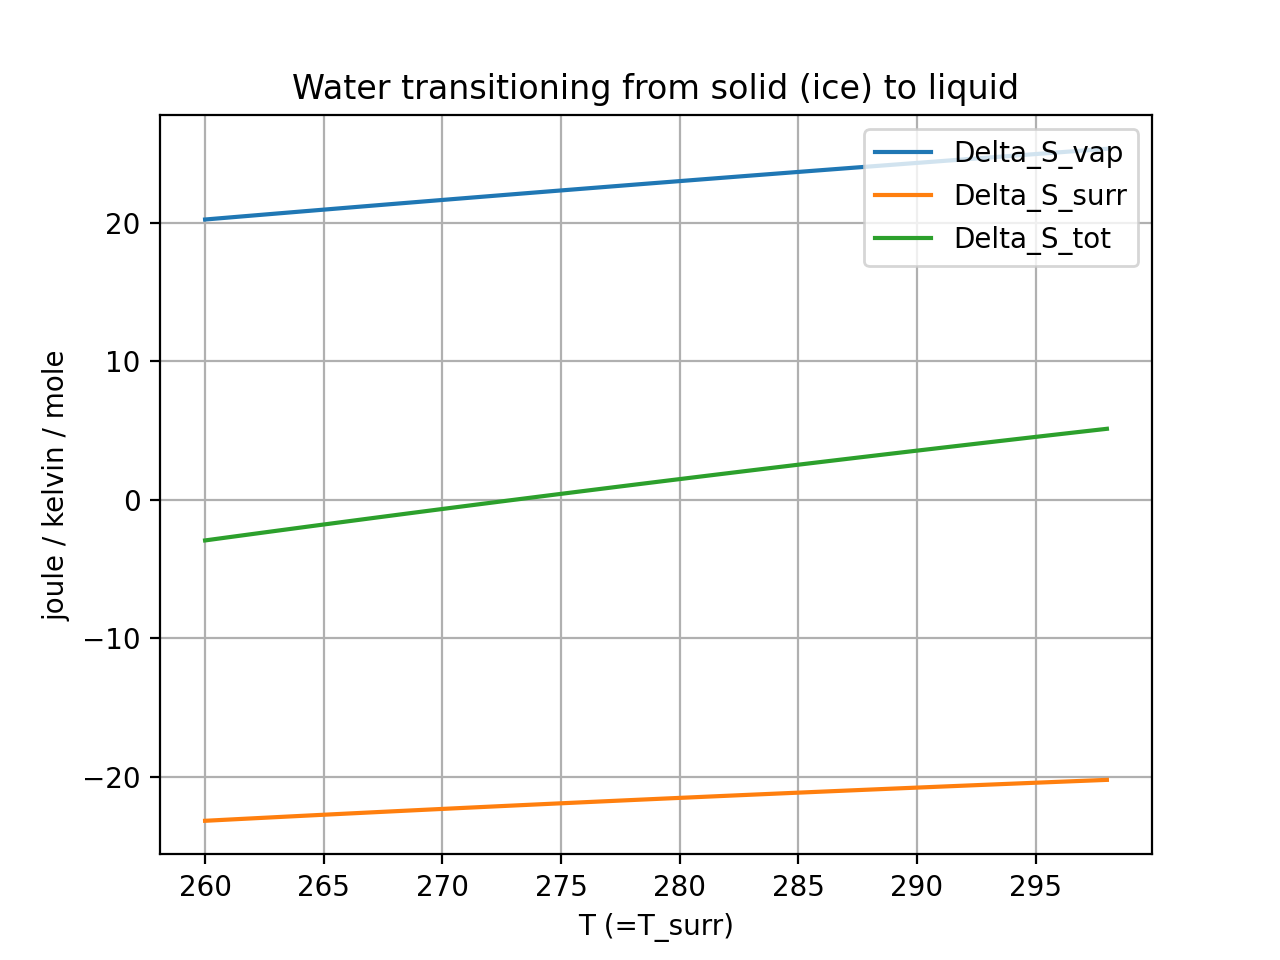

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [6]:
# Laying out an array of temperatures that spans water's melting temperature 
T = T_surr = AssignQuantity(np.linspace(260,298),'K')

# Difference in heat capacities (liquid - solid)
### BEGIN SOLUTION
Delta_CP = CP_liq-CP_sol
### END SOLUTION

# Standard-state entropy of fusion (liquid - solid)
### BEGIN SOLUTION
Delta_S0_fus = SS_liq-SS_sol; print('Delta_S0_fus_298',Delta_S0_fus)
### END SOLUTION

# Temperature-dependent entropy of fusion (Eq. 3)
### BEGIN SOLUTION
Delta_S_fus = Delta_S0_fus + Delta_CP*np.log(T/T0)
### END SOLUTION

# Impact of melting on the entropy of the surrounding (Eq. 4)
### BEGIN SOLUTION
Delta_S_surr = -Delta_H_fus/T_surr
### END SOLUTION

# Use Eq. 1 to calculate the total entropy change of fusion for all the temperatures in our temperature array
### BEGIN SOLUTION
Delta_S_tot = Delta_S_fus + Delta_S_surr
### END SOLUTION

# Graph all three () in J/mol/K
### BEGIN SOLUTION
plt.figure()
plt.plot(T,Delta_S_fus, label='Delta_S_vap')
plt.plot(T,Delta_S_surr,label='Delta_S_surr')
plt.plot(T,Delta_S_tot, label='Delta_S_tot')
plt.grid(True)
plt.title('Water transitioning from solid (ice) to liquid')
plt.xlabel('T (=T_surr)')
plt.ylabel(Delta_S_tot.units)
plt.legend()
### END SOLUTION

### Pause for analysis

In the cell below, write the temperature at which these data predict that ice will melt.

### BEGIN SOLUTION

Seems to be 273 K.

### END SOLUTION

### Ethanol phase transitions
In the cell below, repeat the above analysis to find the temperature at which ethanol will boil at standard atmospheric pressure. Some standard-state values for ethanol that will be handy here:

$S_o(liq) = 160 \ J/(mol \ K)$  
$S_o(gas) = 275 \ J/(mol \ K)$  
$C_P(liq) = 112 \ J/(mol \ K)$  
$C_P(gas) = 70 \ J/(mol \ K)$  
$\Delta H_{vap}^o = 38 \ kJ/mol$

(We're not concerned with melting here -- just vaporization.)

Standard entropy of vaporization= 115 joule / kelvin / mole


<IPython.core.display.Javascript object>


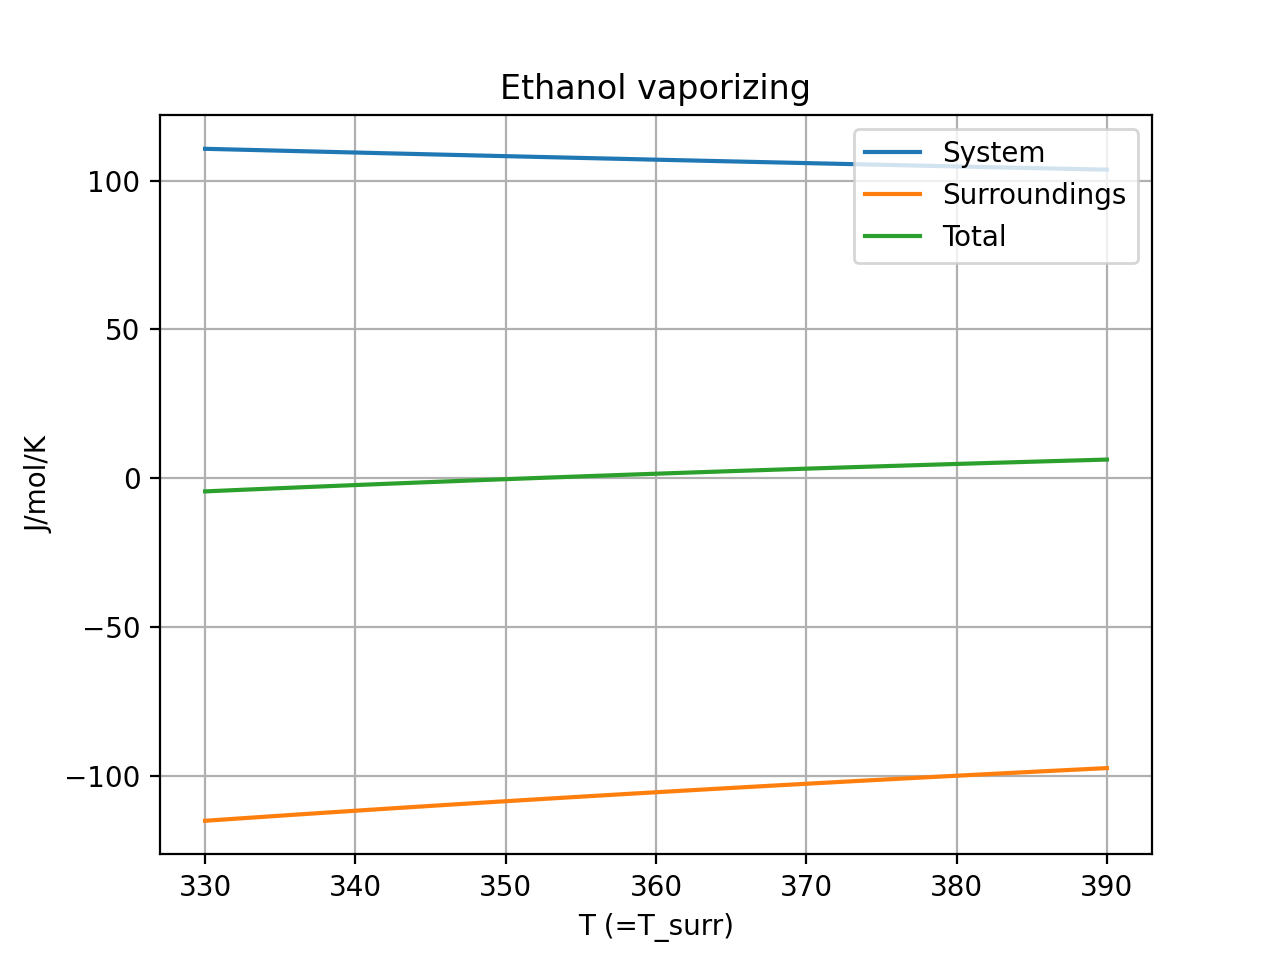

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)
/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


In [7]:
# Laying out an array of temperatures that (hopefully) spans ethanol's boiling temperature 
T = T_surr = AssignQuantity(np.linspace(330,390),'K')

# Graphing the entropy of vaporization, the entropy change of the surroundings, and the total entropy change, for EtOH
### BEGIN SOLUTION
Delta_H_vap = AssignQuantity(38000,'J/mol')
SS_liq = AssignQuantity(160,'J/mol/K')
SS_gas = AssignQuantity(275,'J/mol/K')
Delta_S0_vap = SS_gas-SS_liq; print('Standard entropy of vaporization=', Delta_S0_vap)

# Difference in heat capacities, and (from that) the entropy of vaporization as a function of temperature
CP_liq = AssignQuantity(112,'J/mol/K')
CP_gas = AssignQuantity(70,'J/mol/K')
Delta_CP = CP_gas-CP_liq
Delta_S_vap = Delta_S0_vap + Delta_CP*np.log(T/T0)

# Impact of vaporization on the entropy of the surrounding, as a function of temperature
Delta_S_surr = -Delta_H_vap/T_surr

# Calculate the total entropy change as a function of temperature
Delta_S_tot = Delta_S_vap + Delta_S_surr

# Graph all three
plt.figure()
plt.plot(T,Delta_S_vap,  label='System')
plt.plot(T,Delta_S_surr, label='Surroundings')
plt.plot(T,Delta_S_tot,  label='Total')
plt.grid(True)
plt.title('Ethanol vaporizing')
plt.xlabel('T (=T_surr)')
plt.ylabel('J/mol/K')
plt.legend()
### END SOLUTION

### Pause for analysis

In the cell below, write the temperature at which these data predict that pure ethanol will boil, and how you came to that conclusion.

### BEGIN SOLUTION

Looks like 352 K.

### END SOLUTION

### Refresh/save/validate/close/submit/logout